# **News Summarization**

1. Introduction
2. Loading the data
3. Data Pre-Processing
    - Handling Null (or) NA values
    - Lowecase Transformation
    - Removing HTML tags (if any)
4. Exploratory Data Analysis(EDA)
    - Word Cloud
    - Vocabulary of the Corpus
    - Top 50 Frequent words
    - Top 50 Bigrams and Trigrams
5. Word Embedding
6. LSTM Model
    - Building the model
    - Hyperparameter Tuning
    - Evaluating the model

# ABOUT THE DATA

The main aim of the project is to generate short length descriptions of news articles and summarizing large amount of information which can be represented in compressed space. 

We will be using news summary dataset from kaggle https://www.kaggle.com/sunnysai12345/news-summary . There are two datasets availlable in the kaggle website - `news_summary.csv`, and `news_summary_more.csv`. 

**`news_summary.csv`**  

It consists of 4515 news articles and contains Author_name, Headlines, Url of Article, Short text, Complete Article. Summary of the news article i.e., Short text is gathered from **Inshorts** news app and articles are scraped from **Hindu, Indian times and Guardian**. Time period ranges from febrauary to august 2017.

**`news_summary_more.csv`**  
It has 98401 news articles and cotains only headlines, and text. 

**In this project, we will be using `news_summary.csv` data for generating news summaries.**

# LOADING DATA

In [59]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [37]:
news_summary_df = pd.read_csv(r'news_summary.zip', encoding="ISO-8859-1")
print(f'There are {news_summary_df.shape[0]} rows and {news_summary_df.shape[1]} columns in data set-1')

There are 4514 rows and 6 columns in data set-1


In [38]:
news_summary_more_df = pd.read_csv(r'news_summary_more.zip', encoding="ISO-8859-1")
print(f'There are {news_summary_more_df.shape[0]} rows and {news_summary_more_df.shape[1]} columns in data set-2')

There are 98401 rows and 2 columns in data set-2


In [39]:
# renmaing the columns for better readability
news_summary_df.rename(columns={'read_more':'url', 'text':'short_text', 'ctext':'full_text'}, inplace = True)
news_summary_more_df.rename(columns={'text':'full_text'}, inplace=True)

In [40]:
news_summary_more_df.head()

,headlines,full_text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [41]:
news_summary_more_df.iloc[0,1] 

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [42]:
news_summary_more_df.iloc[0,0] 

'upGrad learner switches to career in ML & Al with 90% salary hike'

In [43]:
news_summary_df.head()

,author,date,headlines,url,short_text,full_text
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [44]:
news_summary_df.iloc[0,3] # URL of the news article

'http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.html?utm_source=inshorts&utm_medium=referral&utm_campaign=fullarticle '

In [45]:
news_summary_df.iloc[0,4] # summary

'The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.'

In [46]:
news_summary_df.iloc[0,5] # full text

'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [47]:
# retaining only full text and short text. Removing all other columns as it not required for training the model

news_df = news_summary_df.filter(['full_text','short_text'])
news_df.head()

,full_text,short_text
0,The Daman and Diu administration on Wednesday ...,The Administration of Union Territory Daman an...
1,"From her special numbers to TV?appearances, Bo...",Malaika Arora slammed an Instagram user who tr...
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Mumbai and other Indian cities are t...,Hotels in Maharashtra will train their staff t...


# DATA PRE-PROCESSING

#### Handling `null/na` values

In [48]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_text   4396 non-null   object
 1   short_text  4514 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


In [49]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_text   4396 non-null   object
 1   short_text  4514 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


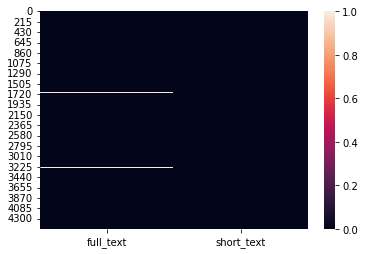

In [50]:
sns.heatmap(news_df.isna()) # few NA values are present in full text column

In [51]:
news_df[news_df['full_text'].isna()]

,full_text,short_text
136,NaN,"Air India's current business is ""not sustainab..."
231,NaN,A 27-year-old woman has told police that her i...
286,NaN,India captain Virat Kohli has said he is not a...
373,NaN,The US Transportation Security Administration ...
399,NaN,Indian golfer Diksha Dagar won a silver medal ...
...,...,...
4361,NaN,"Dong village in Arunachal Pradesh, which is kn..."
4423,NaN,Biocon Chairperson Kiran Mazumdar-Shaw has cal...
4454,NaN,The Indian team got only 17 DRS referrals in t...
4500,NaN,Former Infosys CFO Mohandas Pai has said that ...


**Handling Null and NA values**: There are 118 rows that are having NA in full_text column. Without having news article, we cannot summarize the news. We have **4396 (after removing NAs)** articles to train the model which would be sufficient. Hence, **dropping the documents that do not have news article.**

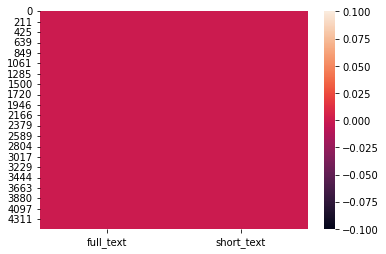

In [52]:
news_df.dropna(inplace=True)
sns.heatmap(news_df.isna()) # ensuring there are no NAs

#### Lowercase Transformation

In [53]:
news_df['short_text'] = news_df['short_text'].apply(str.lower)
news_df['full_text'] = news_df['full_text'].apply(str.lower)

#### Remove HTML tags (if any)

In [54]:
from bs4 import BeautifulSoup
def remove_tags(raw_text:str):
  return BeautifulSoup(raw_text, "lxml").text

In [55]:
news_df['full_text']=news_df['full_text'].apply(lambda text : remove_tags(text))

#### Not Removing Stop Words,and No Lemmetaization/Stemming - Need to add reason

In [57]:
# data after pre processing
news_df.head()

,full_text,short_text
0,the daman and diu administration on wednesday ...,the administration of union territory daman an...
1,"from her special numbers to tv?appearances, bo...",malaika arora slammed an instagram user who tr...
2,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
3,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...
4,hotels in mumbai and other indian cities are t...,hotels in maharashtra will train their staff t...


# 3. DATA EXPLORATION (or) CORPUS STATISTICS

#### Word Cloud

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(news_df['full_text'])

# removing stop words
STOPWORDS = stopwords.words('english')

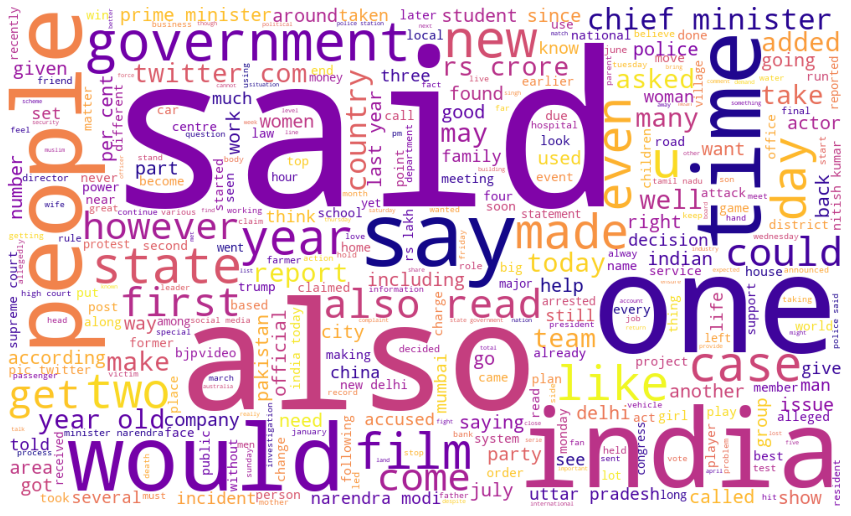

In [68]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                background_color="white", 
                max_words=350, 
                width=1000, 
                height=600, 
                max_font_size=256,
                random_state=1, colormap='plasma').generate(text)

#plot the wordcloud object
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Vocabulary of the Corpus

#### Top 50 Frequent words

#### Top 50 Bigrams and Trigrams

# 4. Word Embedding

# 5. LSTM Model